# Hotel Scores by Topic
### Jeff Ho

This notebook takes topic modeling results and scores each review/hotel. Topics generated via LDA. See 1_TopicModeling for more info.

**Goal:**
Provide recommendations to specific hotels

**Deliverables:**
1. Method to identify topics within reviews
2. Method to assign scores for each topic to each hotel

**Why?**
Understand each hotel’s performance beyond “happy”/“not happy”.


In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from pprint import pprint

### Load review topics and join  to hotel info

In [79]:
review_topics = pd.read_csv('review_topic_probabilities.csv')
review_topics.drop(['Unnamed: 0'],axis=1,inplace=True)
review_topics.fillna(0,inplace=True)
display(review_topics)

df = pd.read_csv('pre_processed_reviews.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
display(df)

df = df.join(review_topics)
display(df)

,0,1,2,3,4,5,6,7,8,9
0,0.614366,0.000000,0.000000,0.259785,0.000000,0.000000,0.000000,0.042424,0.072890,0.000000
1,0.000000,0.146320,0.167900,0.294863,0.032901,0.000000,0.000000,0.000000,0.141913,0.210382
2,0.230113,0.000000,0.051075,0.000000,0.000000,0.000000,0.710055,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.748277,0.000000,0.235713,0.000000,0.000000,0.000000
4,0.000000,0.924982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
38927,0.119976,0.000000,0.109693,0.519192,0.000000,0.000000,0.000000,0.012953,0.016369,0.218998
38928,0.157669,0.000000,0.000000,0.288282,0.162744,0.130608,0.150564,0.000000,0.000000,0.097118
38929,0.000000,0.000000,0.623791,0.000000,0.000000,0.000000,0.357593,0.000000,0.000000,0.000000
38930,0.000000,0.000000,0.121528,0.135007,0.113633,0.623513,0.000000,0.000000,0.000000,0.000000


,User_ID,Description,Is_Response,hotel_ID,processed_review
0,id10329,Stayed here with husband and sons on the way t...,happy,8,"['stay', 'husband', 'son', 'way', 'alaska', 'c..."
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3,"['room', 'nice', 'clear', 'updat', 'recent', '..."
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3,"['wife', 'stay', 'glorious', 'citi', 'sf', 'ex..."
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7,"['boyfriend', 'stay', 'fairmont', 'recent', 't..."
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3,"['step', 'time', 'squar', 'nice', 'room', 'sta..."
...,...,...,...,...,...
38927,id49249,I am pretty impartial to this hotel. I would d...,not happy,2,"['pretti', 'imparti', 'hotel', 'definit', 'tel..."
38928,id49252,I tend to post reviews only when I’ve had an e...,not happy,1,"['tend', 'post', 'review', 've', 'except', 'ex..."
38929,id49254,The only positive impression is location and p...,not happy,2,"['posit', 'impress', 'locat', 'public', 'park'..."
38930,id49255,Traveling with friends for shopping and a show...,not happy,5,"['travel', 'friend', 'shop', 'locat', 'great',..."


,User_ID,Description,Is_Response,hotel_ID,processed_review,0,1,2,3,4,5,6,7,8,9
0,id10329,Stayed here with husband and sons on the way t...,happy,8,"['stay', 'husband', 'son', 'way', 'alaska', 'c...",0.614366,0.000000,0.000000,0.259785,0.000000,0.000000,0.000000,0.042424,0.072890,0.000000
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3,"['room', 'nice', 'clear', 'updat', 'recent', '...",0.000000,0.146320,0.167900,0.294863,0.032901,0.000000,0.000000,0.000000,0.141913,0.210382
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3,"['wife', 'stay', 'glorious', 'citi', 'sf', 'ex...",0.230113,0.000000,0.051075,0.000000,0.000000,0.000000,0.710055,0.000000,0.000000,0.000000
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7,"['boyfriend', 'stay', 'fairmont', 'recent', 't...",0.000000,0.000000,0.000000,0.000000,0.748277,0.000000,0.235713,0.000000,0.000000,0.000000
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3,"['step', 'time', 'squar', 'nice', 'room', 'sta...",0.000000,0.924982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38927,id49249,I am pretty impartial to this hotel. I would d...,not happy,2,"['pretti', 'imparti', 'hotel', 'definit', 'tel...",0.119976,0.000000,0.109693,0.519192,0.000000,0.000000,0.000000,0.012953,0.016369,0.218998
38928,id49252,I tend to post reviews only when I’ve had an e...,not happy,1,"['tend', 'post', 'review', 've', 'except', 'ex...",0.157669,0.000000,0.000000,0.288282,0.162744,0.130608,0.150564,0.000000,0.000000,0.097118
38929,id49254,The only positive impression is location and p...,not happy,2,"['posit', 'impress', 'locat', 'public', 'park'...",0.000000,0.000000,0.623791,0.000000,0.000000,0.000000,0.357593,0.000000,0.000000,0.000000
38930,id49255,Traveling with friends for shopping and a show...,not happy,5,"['travel', 'friend', 'shop', 'locat', 'great',...",0.000000,0.000000,0.121528,0.135007,0.113633,0.623513,0.000000,0.000000,0.000000,0.000000


### Get affinity to topics by hotel

In [80]:
# get average topic score by hotel
colnames = ['hotel_ID']+[str(i) for i in list(range(10))]
hotel_by_topic = df[colnames].groupby('hotel_ID').mean()
display(hotel_by_topic)

,0,1,2,3,4,5,6,7,8,9
hotel_ID,,,,,,,,,,
1,0.093831,0.094631,0.069583,0.091541,0.108863,0.203295,0.074089,0.049010,0.083474,0.118013
2,0.086353,0.096380,0.065021,0.096289,0.107552,0.221404,0.074341,0.045281,0.075894,0.118131
3,0.101556,0.098931,0.067822,0.095769,0.120905,0.172133,0.078984,0.053158,0.088486,0.108054
4,0.100381,0.101249,0.065635,0.090823,0.120558,0.171993,0.078679,0.052237,0.091279,0.113607
5,0.114129,0.110243,0.062756,0.090212,0.130754,0.134361,0.086083,0.054251,0.099167,0.103950
6,0.100755,0.107359,0.064964,0.093646,0.122367,0.160035,0.083078,0.054524,0.082856,0.116867
7,0.096675,0.096336,0.066916,0.094687,0.107910,0.200563,0.075211,0.047222,0.084741,0.115974
8,0.115824,0.107237,0.064480,0.091736,0.135272,0.131633,0.086097,0.053027,0.101002,0.099201
9,0.086521,0.091913,0.066480,0.102185,0.113919,0.216446,0.070979,0.043962,0.079134,0.114496


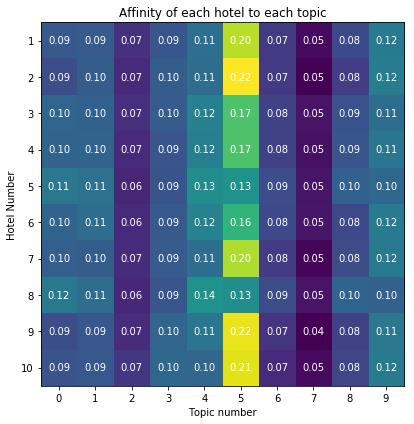

In [81]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(hotel_by_topic)

# We want to show all ticks...
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
# ... and label them with the respective list entries
ax.set_yticklabels(np.arange(1,11,1))
plt.ylabel('Hotel Number')
plt.xlabel('Topic number')

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, '{:.2f}'.format(hotel_by_topic[str(j)][i+1]),
                       ha="center", va="center", color="w")

ax.set_title("Affinity of each hotel to each topic")
fig.tight_layout()
plt.show()